In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

SH=pd.read_excel('/Users//stanley//Desktop//上证指数.xlsx','Sheet0',header=0,index_col=0)
SH.describe()
SH_log=np.log(SH/SH.shift(1))  #得到上证指数的2015~2020.3.31日收益率
SH_log=SH_log.dropna()
miu=SH_log.mean()*252
sig=SH_log.std()*np.sqrt(252)
print('上证指数的预期年化收益率',round(miu,4))
print('上证指数的预期波动率',round(sig,4))

上证指数的预期年化收益率 收盘价   -0.0194
dtype: float64
上证指数的预期波动率 收盘价    0.2395
dtype: float64


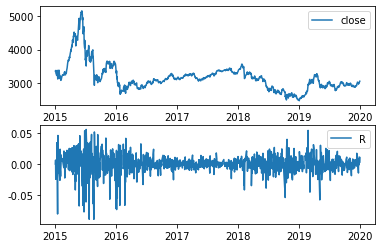

In [4]:
#绘制上证指数收盘价及对数收益率
plt.subplot(211)
plt.plot(SH, label=u'close')#上证指数收盘价
plt.legend(loc='best')
plt.subplot(212)
plt.plot(SH_log, label=u'R')#上证指数收盘价收益率
plt.legend(loc='best')
plt.show()

In [ ]:
#股价的蒙特卡洛模拟
def M_simulation(date,n,miu,sig,price):
    '''date：模拟的时间期限
       n:模拟的次数
       miu:均值
       sig：方差
       price：初始价格'''
    import numpy.random as npr
    N=len(date)
    I=n
    dt=1.0/252
    mu=np.array(miu)
    sigma=np.array(sig)
    S_GBM=np.zeros((N,I))
    S_GBM[0]=price
    for t in range(1,N):
        epsilon=npr.standard_normal(I)
        S_GBM[t]=S_GBM[t-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*epsilon*np.sqrt(dt))
    S_GBM=pd.DataFrame(S_GBM,index=date)
    plt.figure(figsize=(10,8))
    plt.plot(S_GBM)
    plt.xlabel(u'date',fontsize=13)#日期
    plt.ylabel(u'close',fontsize=13,rotation=0)#收盘价
    plt.xticks(fontsize=13,rotation=30)
    plt.yticks(fontsize=13)
    plt.title(u'geometric_Brownian_motion',fontsize=13)#服从几何布朗运动的模拟
    plt.grid('True')
    plt.show()
    return S_GBM
    
date=pd.date_range('2020-3-31','2020-12-31',freq='B')
simulation=M_simulation(date,100,miu,sig,SH.iat[-1,0]) #取历史数据上证指数最后一个数
simulation